# Dark

In [1]:
ifstream all;
all.open("../data/20230209/20230209_dark.txt", ios::in);
std::vector<double> frame, time1, ampl1;
std::map<double, std::vector<double>> ampl1_perframe, time1_perframe;

if (all.is_open())
{ // checking whether the file is open
    double t1, t2, t3;
    while (!all.eof())
    {
        all >> t1 >> t2 >> t3;
        ampl1_perframe[(int)t1].push_back(t3);   
        time1_perframe[(int)t1].push_back(t2*1.e9);   
        frame.push_back(t1);
        time1.push_back(t2*1.e9);
        ampl1.push_back(t3);
     
    }
    all.close(); // close the file object.    
}

In [2]:
int NEvents = frame.size();
cout << NEvents << endl;

2590001


In [3]:
int n_frames = 15;

In [4]:
TGraph *ampl_vs_time;
ampl_vs_time = new TGraph[n_frames];
Int_t *n_point;
n_point = new Int_t[n_frames];
for(int i = 0; i < n_frames; i++){
    n_point[i] = 0;
}

In [5]:
for(int i = 0;i<NEvents; i++){
    if(frame[i] < n_frames){
        ampl_vs_time[(int)frame[i]].SetPoint(n_point[(int)frame[i]], time1[i], ampl1[i]*1000);
        n_point[(int)frame[i]]++;
    }
}

In [6]:
for(int i = 0; i < n_frames; i++){
    ampl_vs_time[i].Set(n_point[i]);
}

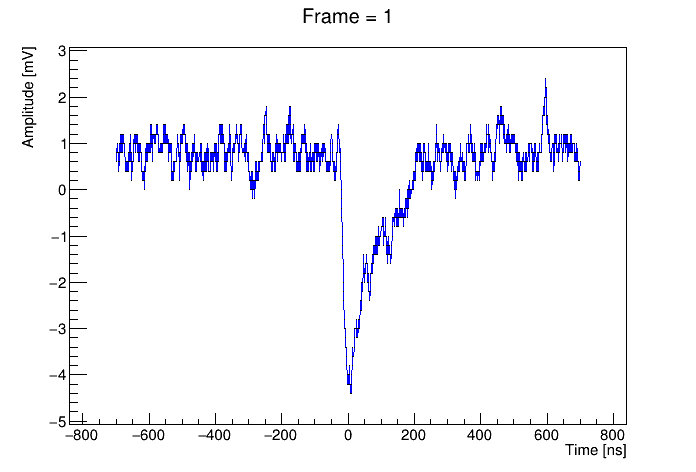

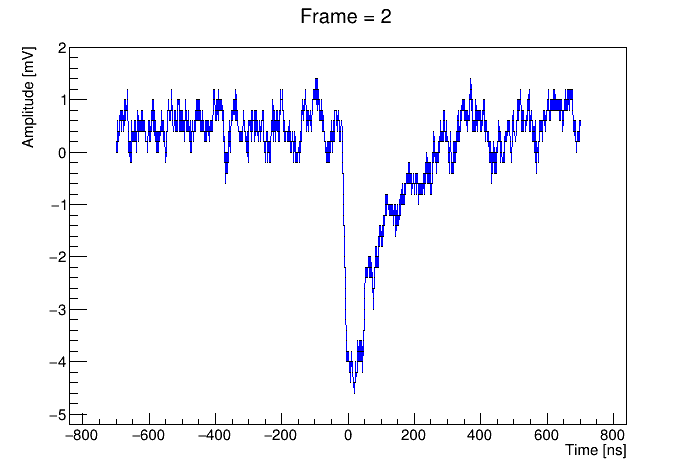

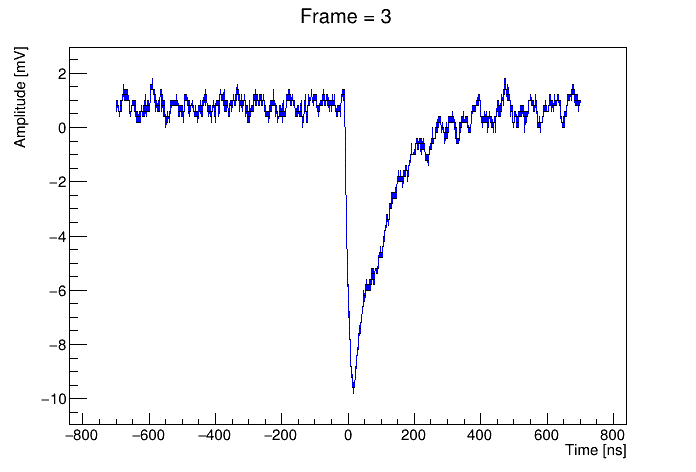

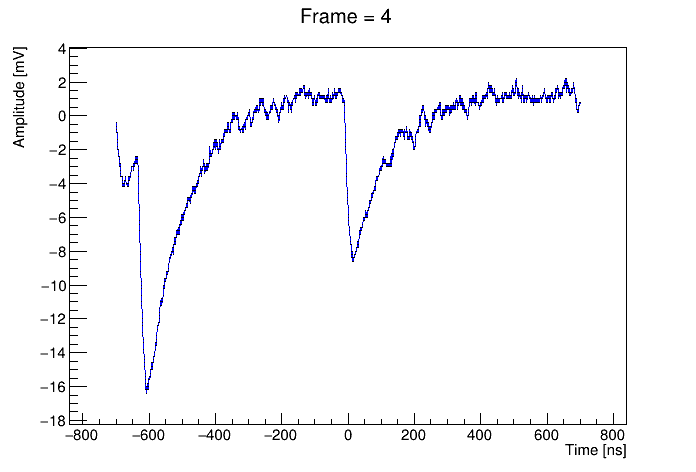

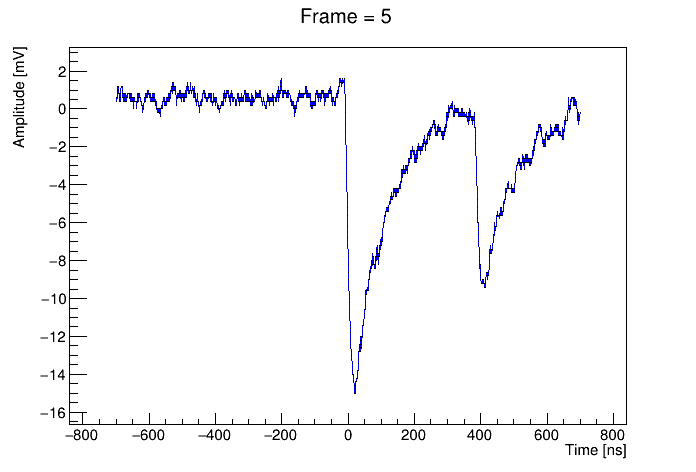

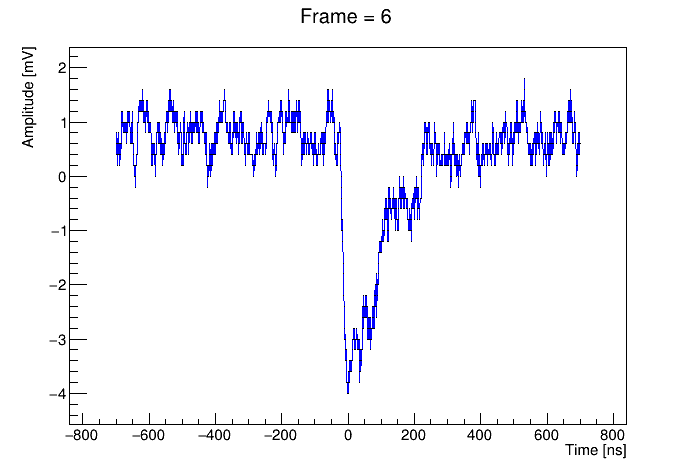

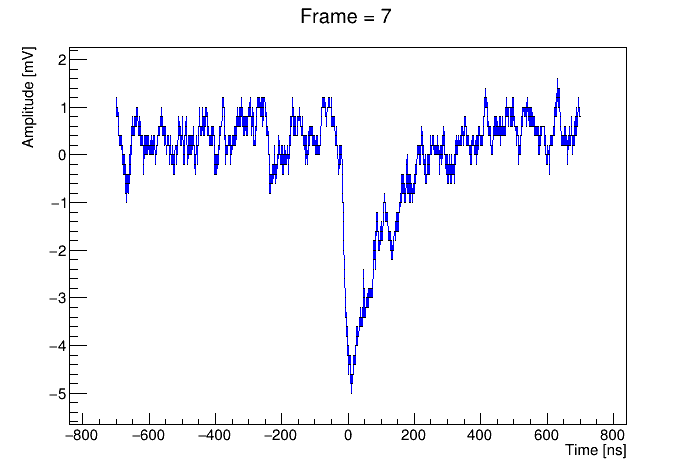

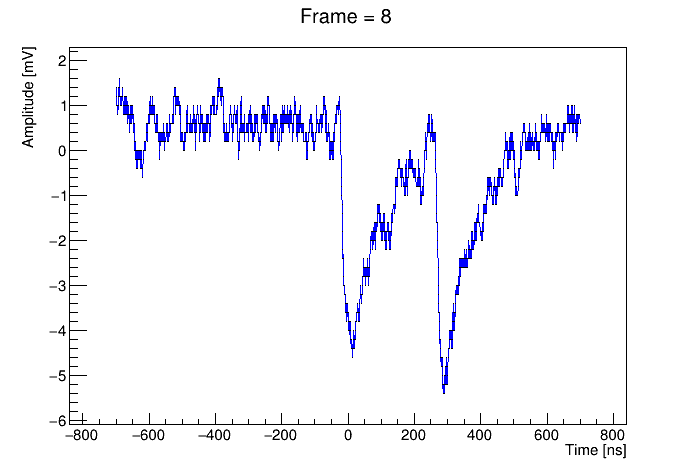

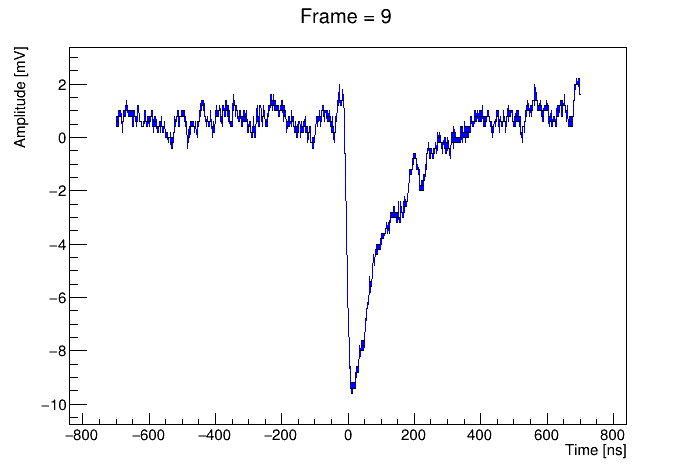

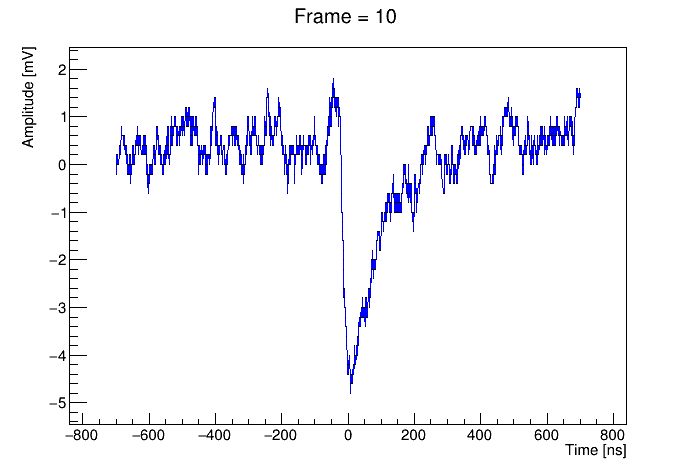

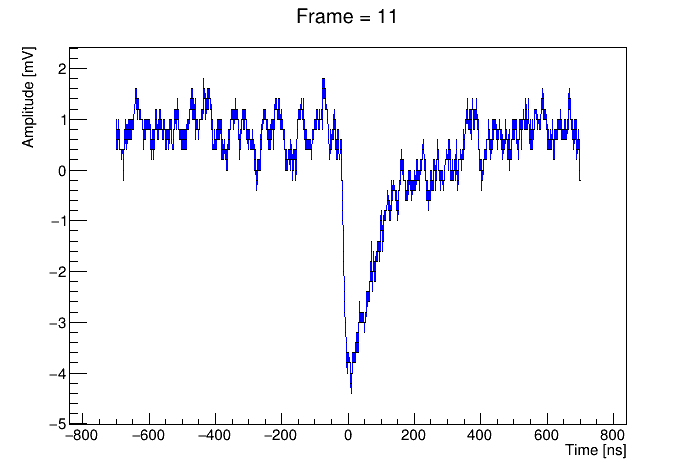

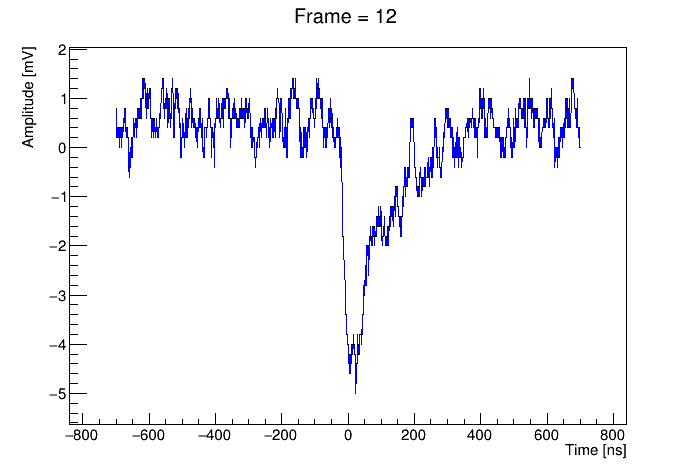

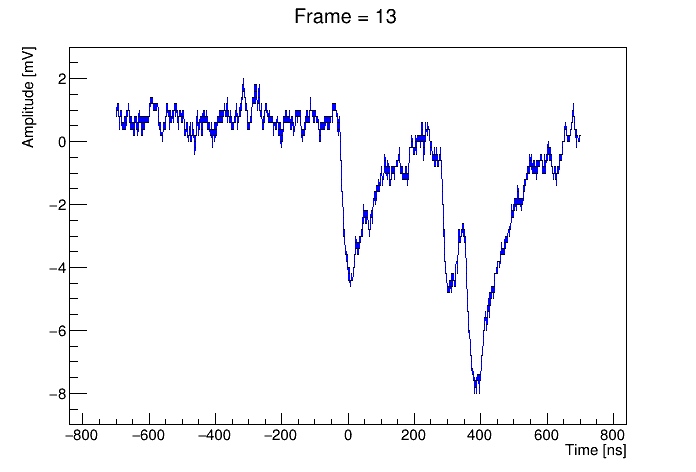

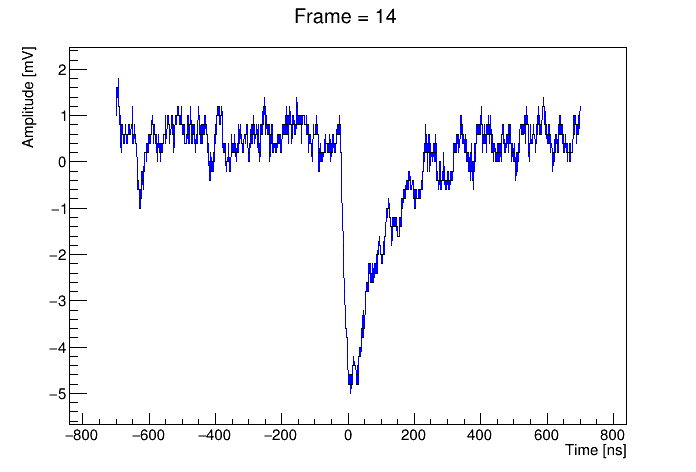

In [7]:
TCanvas *c1;
c1 = new TCanvas[n_frames];
for(int i = 1; i < n_frames; i++){
    c1[i].cd();
    ampl_vs_time[i].SetLineColor(kBlue);
    ampl_vs_time[i].SetTitle(Form("Frame = %d", i));
    ampl_vs_time[i].GetXaxis()->SetTitle("Time [ns]");
    ampl_vs_time[i].GetYaxis()->SetTitle("Amplitude [mV]");
    ampl_vs_time[i].Draw();
    c1[i].Update();
    c1[i].Draw();
}

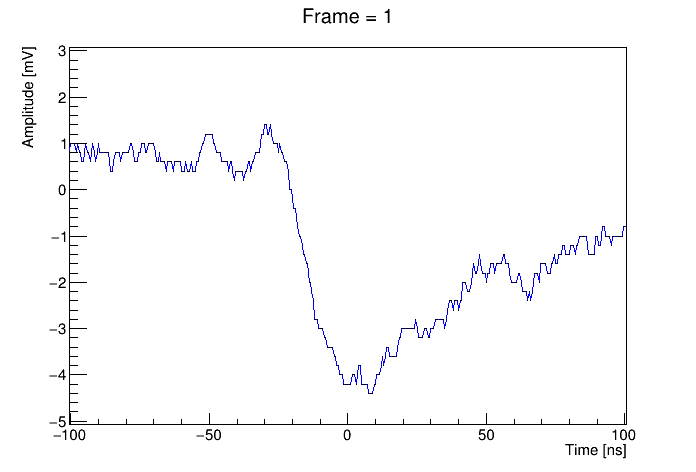

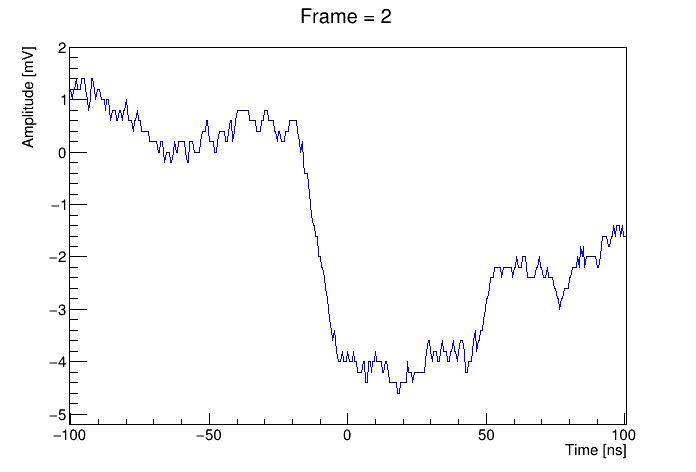

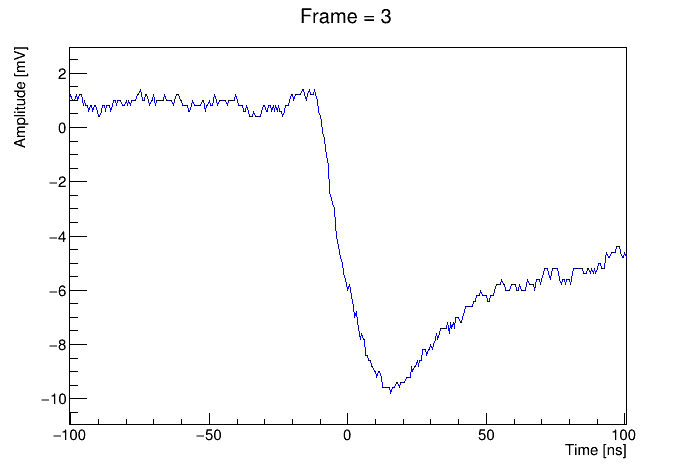

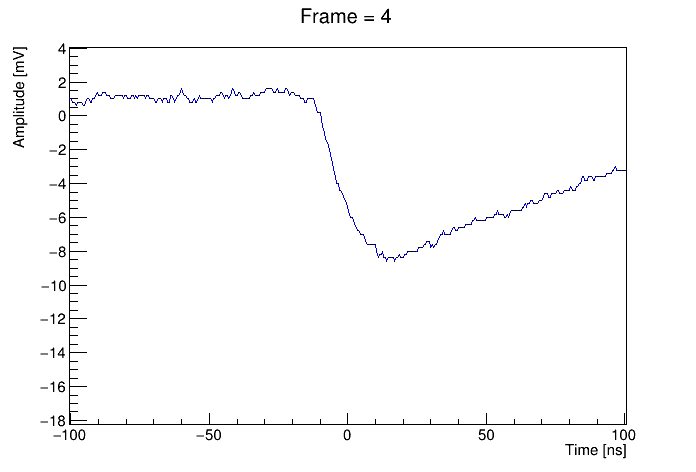

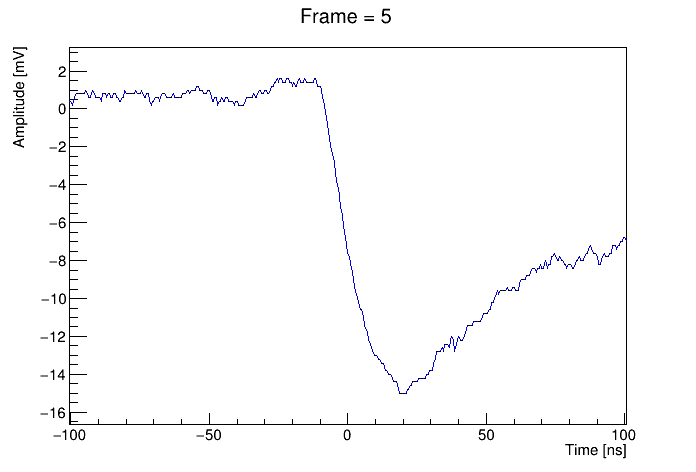

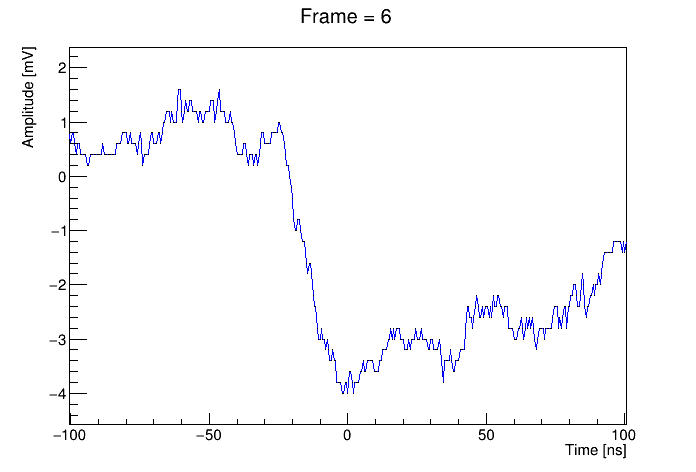

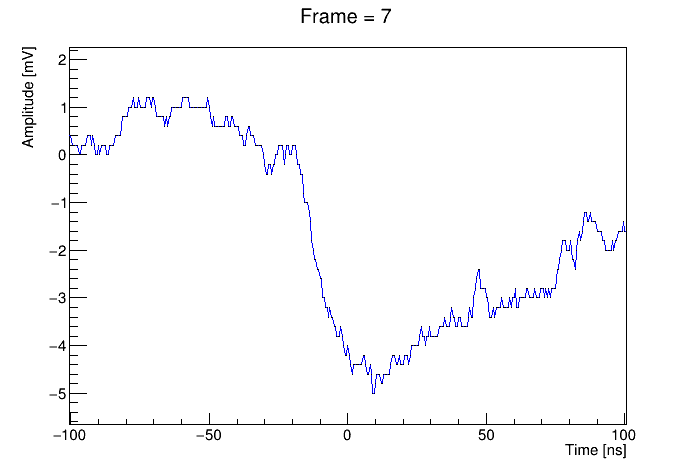

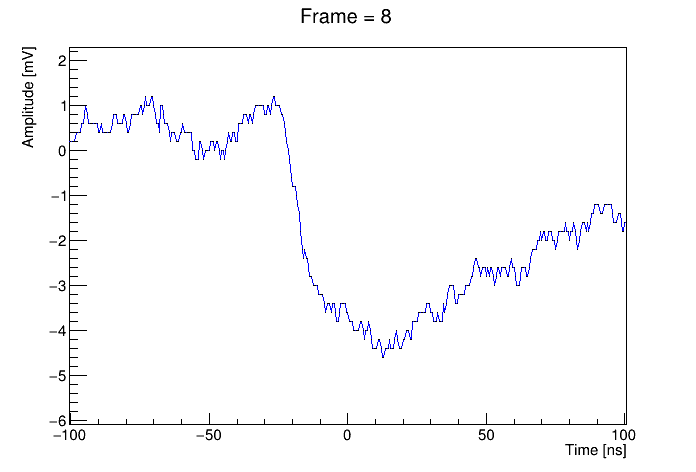

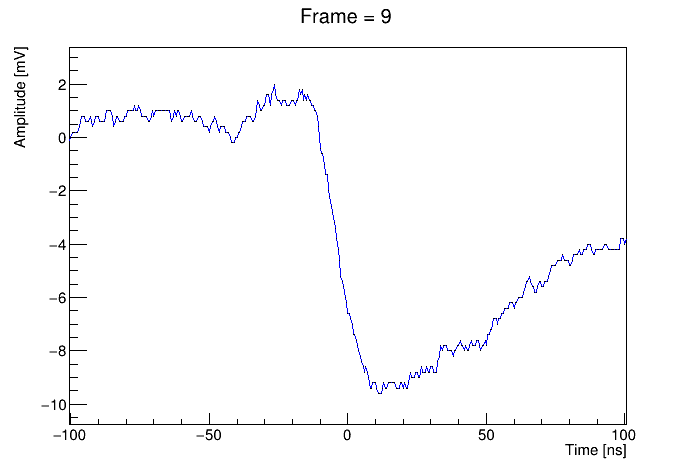

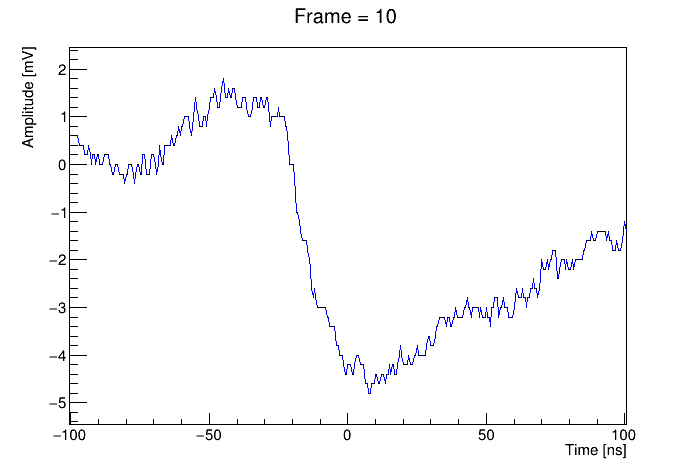

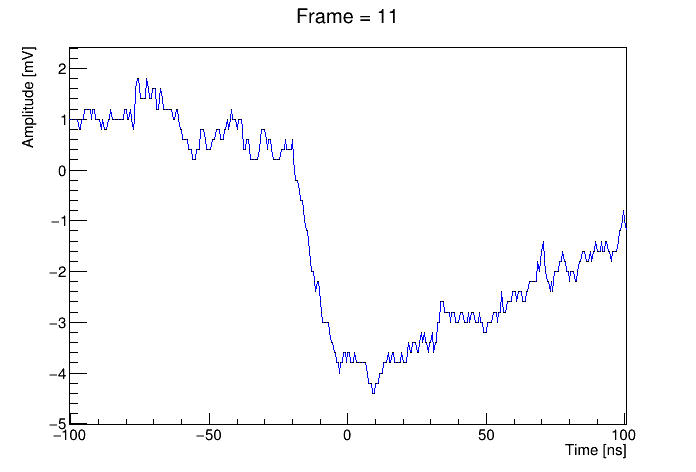

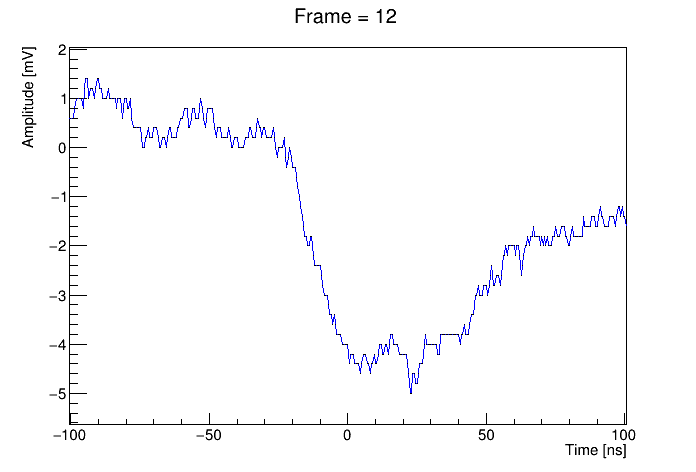

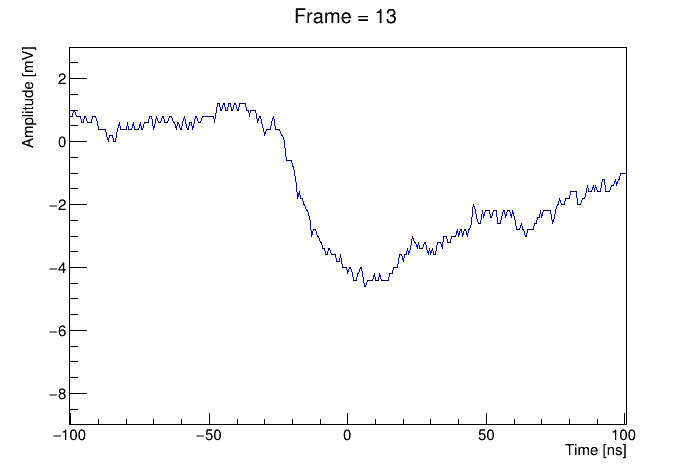

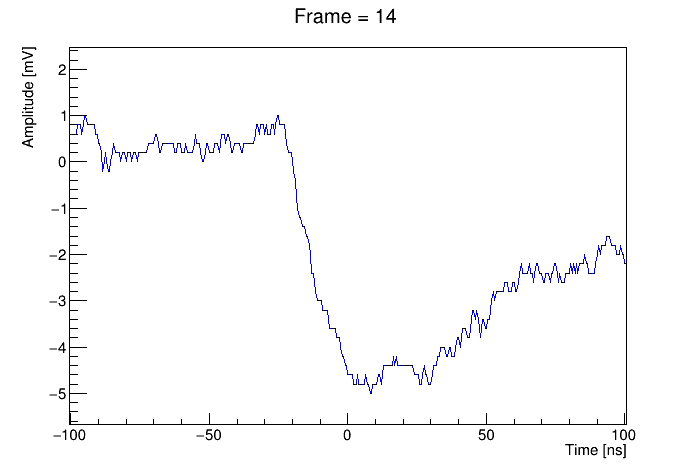

In [8]:
TCanvas *c2;
c2 = new TCanvas[n_frames];
for(int i = 1; i < n_frames; i++){
    c2[i].cd();
    ampl_vs_time[i].SetLineColor(kBlue);
    ampl_vs_time[i].SetTitle(Form("Frame = %d", i));
    ampl_vs_time[i].GetXaxis()->SetTitle("Time [ns]");
    ampl_vs_time[i].GetYaxis()->SetTitle("Amplitude [mV]");
    ampl_vs_time[i].GetXaxis()->SetRangeUser(-100,100);
    ampl_vs_time[i].Draw();
    c2[i].Update();
    c2[i].Draw();
}

In [32]:
std::vector<int> index_frame;
for(int i = 0; i< NEvents; i++){
    bool unique=true;
    for (int a = 0; a < index_frame.size(); a++)
    {
        unique = (frame[i]!=index_frame[a]);
    }
    if(unique){
        index_frame.push_back((int)frame[i]);
    }
}
int n_index_frame = index_frame.size(); 
cout << index_frame.size() << endl;

925


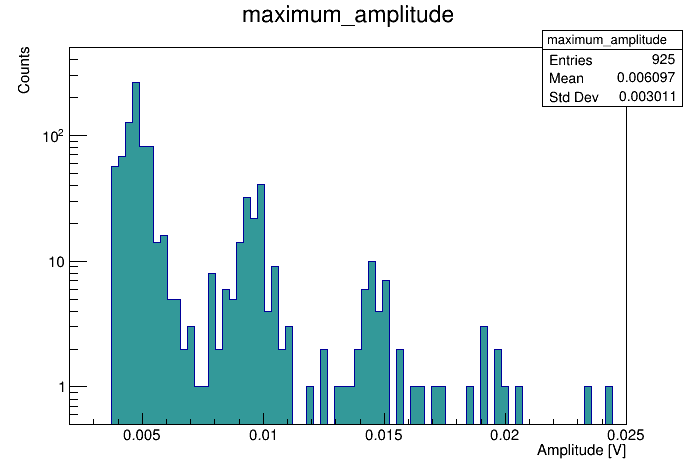

Warning in <TROOT::Append>: Replacing existing TH1: maximum_amplitude (Potential memory leak).


In [36]:
TH1F maximum_amplitude("maximum_amplitude","maximum_amplitude", 80, 0.002, 0.025);
for(int i = 1; i <= n_index_frame ; i++){
    maximum_amplitude.Fill(abs(*min_element(ampl1_perframe[i].begin(),ampl1_perframe[i].end())));
}
TCanvas c3;
c3.cd();
maximum_amplitude.GetXaxis()->SetTitle("Amplitude [V]");
maximum_amplitude.GetYaxis()->SetTitle("Counts");
maximum_amplitude.SetFillColor(kCyan - 2);
maximum_amplitude.Draw("hist");
c3.SetLogy();
c3.Draw();


# CsI

In [2]:
ifstream csi;
csi.open("../data/20230209/20230209_csi_thrext_150mV.txt", ios::in);
std::vector<double> frame, time1, ampl1, time2, ampl2;
std::map<double, std::vector<double>> ampl1_perframe, time1_perframe;
std::map<double, std::vector<double>> ampl2_perframe, time2_perframe;

if (csi.is_open())
{ // checking whether the file is open
    double t1, t2, t3, t4, t5;
    while (!csi.eof())
    {
        csi >> t1 >> t2 >> t3 >> t4 >> t5;
        ampl1_perframe[(int)t1].push_back(t3);   
        time1_perframe[(int)t1].push_back(t2*1.e9);   
        ampl2_perframe[(int)t1].push_back(t5);   
        time2_perframe[(int)t1].push_back(t4*1.e9);   
        frame.push_back(t1);
        time1.push_back(t2*1.e9);
        ampl1.push_back(t3);
        time2.push_back(t4*1.e9);
        ampl2.push_back(t5);
     
    }
    csi.close(); // close the file object.    
}

In [3]:
int NEvents = frame.size();
cout << NEvents << endl;

18356801


In [4]:
int n_frames = 15;

In [5]:
TGraph *ampl1_vs_time1;
ampl1_vs_time1 = new TGraph[n_frames];
TGraph *ampl2_vs_time2;
ampl2_vs_time2 = new TGraph[n_frames];
Int_t *n_point;
n_point = new Int_t[n_frames];
for(int i = 0; i < n_frames; i++){
    n_point[i] = 0;
}

In [6]:
for(int i = 0;i<NEvents; i++){
    if(frame[i] < n_frames){
        ampl1_vs_time1[(int)frame[i]].SetPoint(n_point[(int)frame[i]], time1[i], ampl1[i]*1000);
        ampl2_vs_time2[(int)frame[i]].SetPoint(n_point[(int)frame[i]], time2[i], ampl2[i]*500);
        n_point[(int)frame[i]]++;
    }
}

In [7]:
for(int i = 0; i < n_frames; i++){
    ampl1_vs_time1[i].Set(n_point[i]);
    ampl2_vs_time2[i].Set(n_point[i]);
}

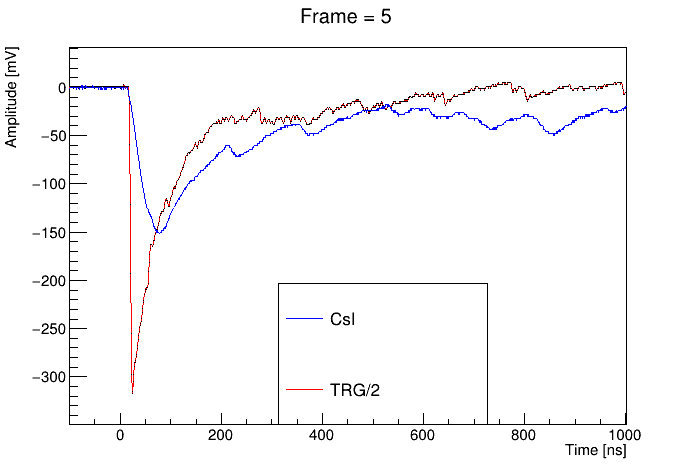

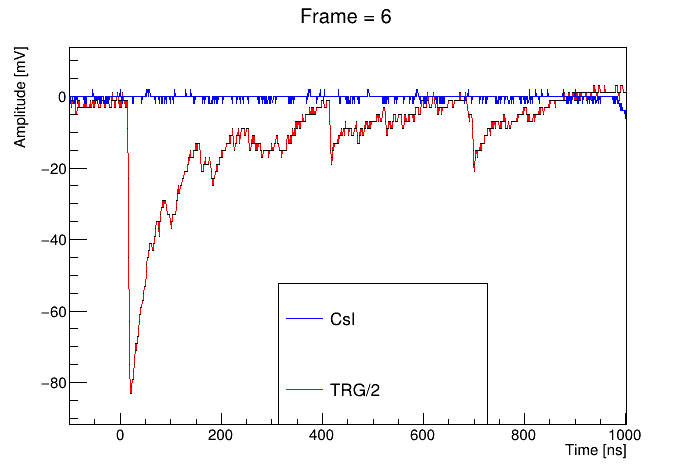

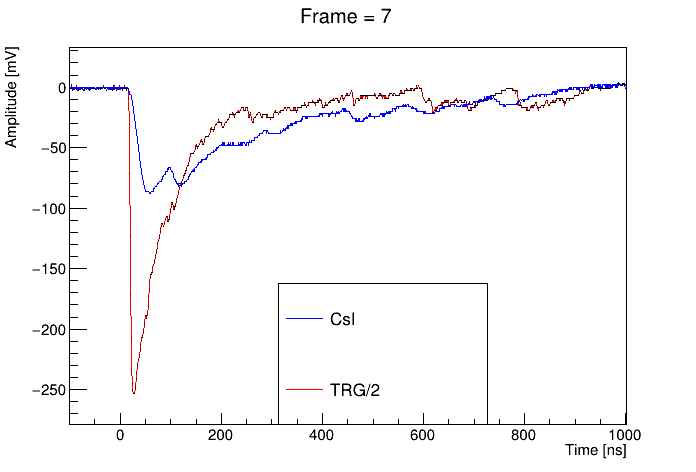

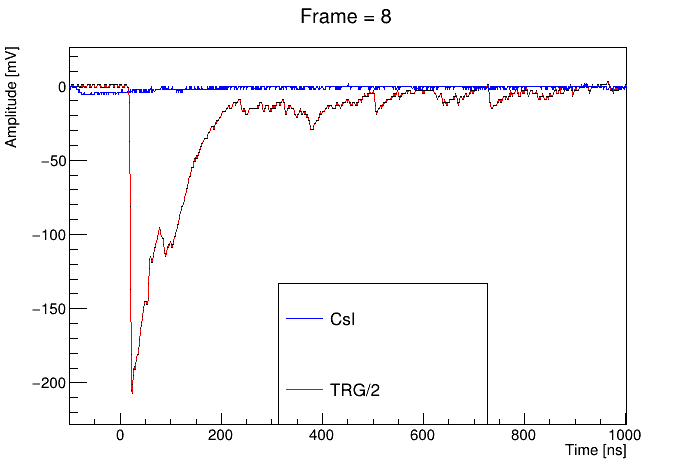

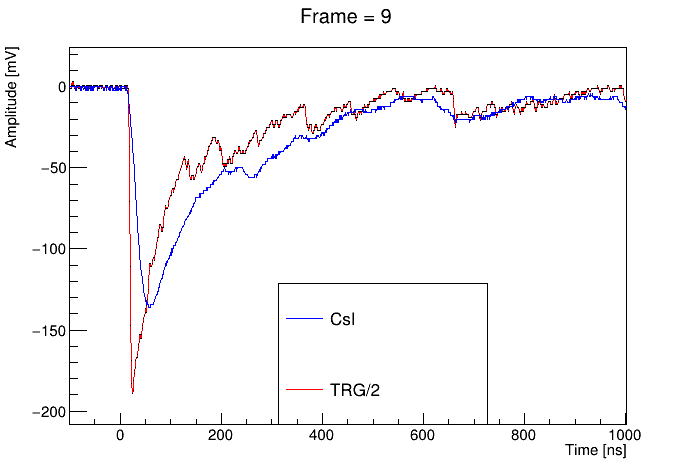

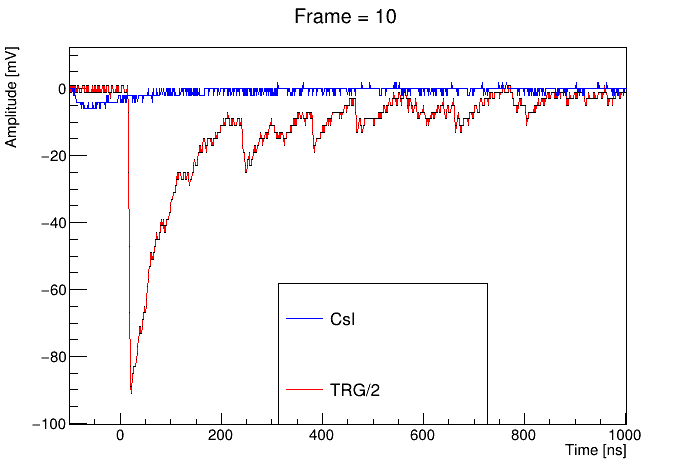

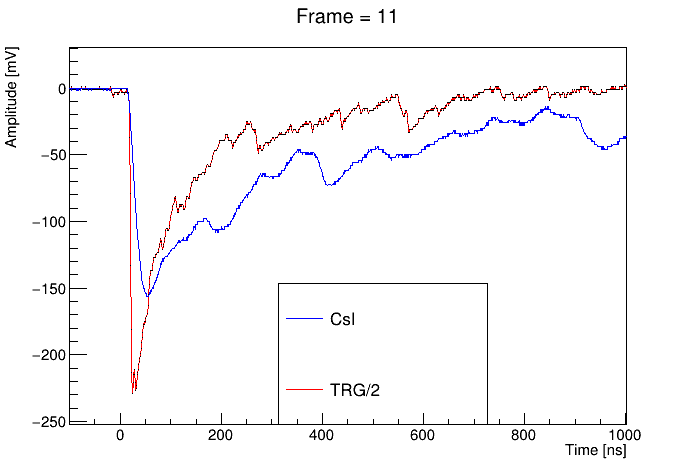

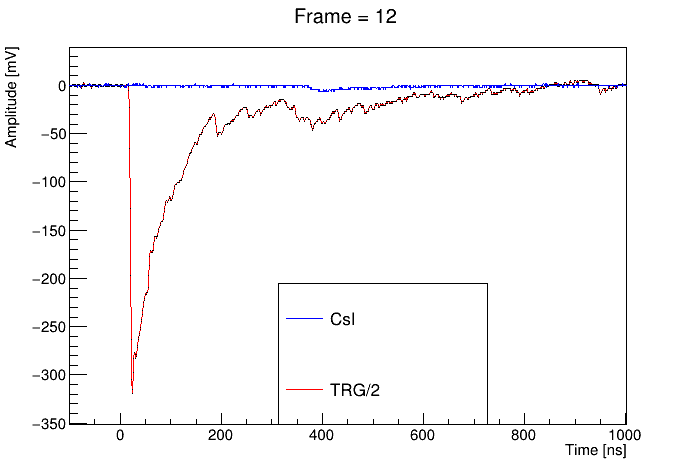

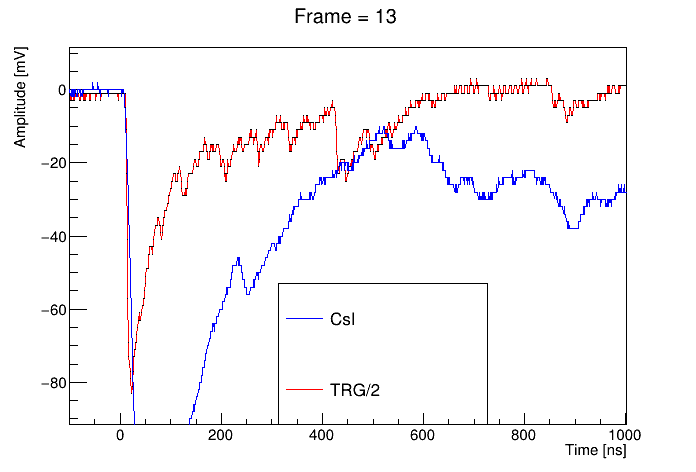

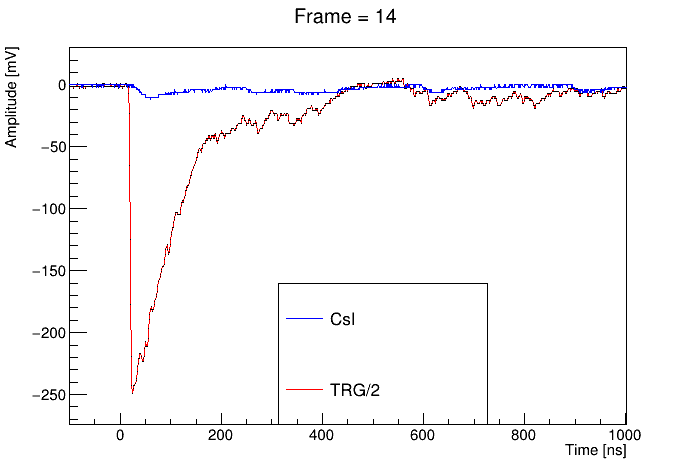

In [8]:
TCanvas *c1;
c1 = new TCanvas[n_frames];
for(int i = 5; i < n_frames; i++){
    ampl1_vs_time1[i].SetLineColor(kBlue);
    ampl2_vs_time2[i].SetLineColor(kRed);
    ampl2_vs_time2[i].SetTitle(Form("Frame = %d", i));
    ampl2_vs_time2[i].GetXaxis()->SetTitle("Time [ns]");
    ampl2_vs_time2[i].GetXaxis()->SetRangeUser(-100,1000);
    ampl2_vs_time2[i].GetYaxis()->SetTitle("Amplitude [mV]");
    c1[i].cd();
    ampl2_vs_time2[i].Draw();
    ampl1_vs_time1[i].Draw("same");
    TLegend *leg = new TLegend(0.4, 0.1, 0.7, 0.4);
    leg->SetFillColor(0);
    leg->SetTextSize(0.04);
    leg->SetTextFont(42);
    leg->SetFillStyle(0);
    leg->AddEntry(&ampl1_vs_time1[i], "CsI", "l");
    leg->AddEntry(&ampl2_vs_time2[i], "TRG/2", "l");
    leg->Draw();
    c1[i].Update();
    c1[i].Draw();
}

In [8]:
std::vector<int> index_frame;
for(int i = 0; i< NEvents; i++){
    bool unique=true;
    for (int a = 0; a < index_frame.size(); a++)
    {
        unique = (frame[i]!=index_frame[a]);
    }
    if(unique){
        index_frame.push_back((int)frame[i]);
    }
}
int n_index_frame = index_frame.size(); 
cout << index_frame.size() << endl;

6556


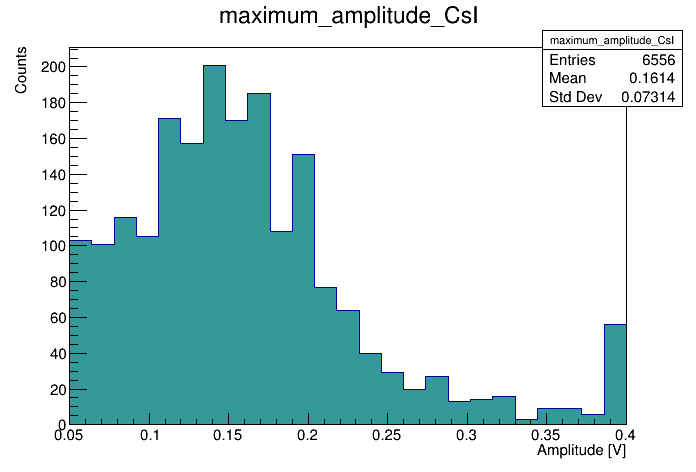

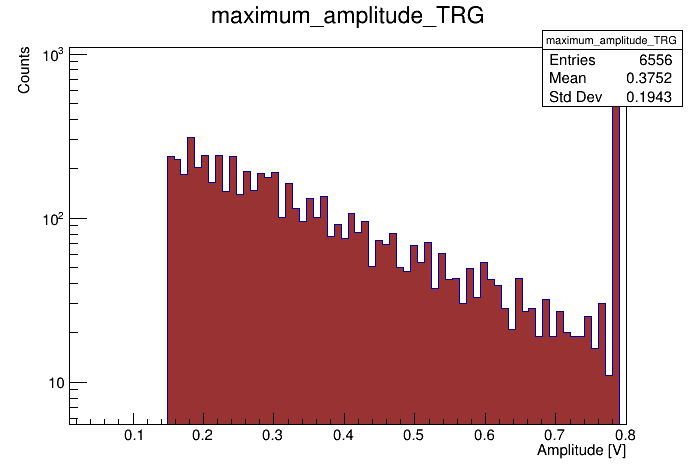

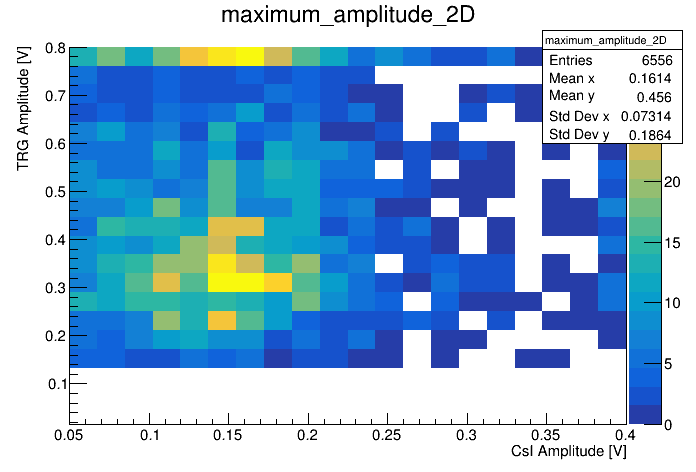

Warning in <TROOT::Append>: Replacing existing TH1: maximum_amplitude_CsI (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: maximum_amplitude_TRG (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: maximum_amplitude_2D (Potential memory leak).


In [28]:
TH1F maximum_amplitude1("maximum_amplitude_CsI","maximum_amplitude_CsI", 25, 0.05, 0.4);
TH1F maximum_amplitude2("maximum_amplitude_TRG","maximum_amplitude_TRG", 80, 0.01, 0.8);
TH2F maximum_amplitude_2d("maximum_amplitude_2D","maximum_amplitude_2D", 20, 0.05, 0.4, 20, 0.015, 0.8);
for(int i = 2; i <= 6557 ; i++){
    maximum_amplitude1.Fill(abs(*min_element(ampl1_perframe[i].begin(),ampl1_perframe[i].end())));
    maximum_amplitude2.Fill(abs(*min_element(ampl2_perframe[i].begin(),ampl2_perframe[i].end())));
    maximum_amplitude_2d.Fill(abs(*min_element(ampl1_perframe[i].begin(),ampl1_perframe[i].end())), abs(*min_element(ampl2_perframe[i].begin(),ampl2_perframe[i].end())));
}
TCanvas c3;
c3.cd();
maximum_amplitude1.GetXaxis()->SetTitle("Amplitude [V]");
maximum_amplitude1.GetYaxis()->SetTitle("Counts");
maximum_amplitude1.SetFillColor(kCyan - 2);
maximum_amplitude1.Draw("hist");
//c3.SetLogy();
c3.Draw();
TCanvas c4;
c4.cd();
maximum_amplitude2.GetXaxis()->SetTitle("Amplitude [V]");
maximum_amplitude2.GetYaxis()->SetTitle("Counts");
maximum_amplitude2.SetFillColor(kRed - 2);
maximum_amplitude2.Draw("hist");
c4.SetLogy();
c4.Draw();
TCanvas c5;
c5.cd();
maximum_amplitude_2d.GetXaxis()->SetTitle("CsI Amplitude [V]");
maximum_amplitude_2d.GetYaxis()->SetTitle("TRG Amplitude [V]");
maximum_amplitude_2d.Draw("colz");
c5.Draw();

# CsI triggered ext right

In [1]:
ifstream csi_right;
csi_right.open("../data/20230210/20230210_csi_thrext_150mV_destra.txt", ios::in);
std::vector<double> frame, time1, ampl1, ampl2;
std::map<double, std::vector<double>> ampl1_perframe, time1_perframe;
std::map<double, std::vector<double>> ampl2_perframe;

if (csi_right.is_open())
{ // checking whether the file is open
    double t1, t2, t3, t4, t5, t6, t7, t8, t9;
    while (!csi_right.eof())
    {
        csi_right >> t1 >> t2 >> t3 >> t4 >> t5 >> t6 >> t7 >> t8 >> t9;
        ampl1_perframe[(int)t1].push_back(t3);   
        time1_perframe[(int)t1].push_back(t2*1.e9);   
        ampl2_perframe[(int)t1].push_back(t5);   
        //time2_perframe[(int)t1].push_back(t4*1.e9);   
        frame.push_back(t1);
        time1.push_back(t2*1.e9);
        ampl1.push_back(t3);
        //time2.push_back(t4*1.e9);
        ampl2.push_back(t5);
     
    }
    csi_right.close(); // close the file object.    
}

In [2]:
int NEvents = frame.size();
cout << NEvents << endl;

5845778


In [3]:
int n_frames = 15;

In [4]:
TGraph *ampl1_vs_time1;
ampl1_vs_time1 = new TGraph[n_frames];
TGraph *ampl2_vs_time2;
ampl2_vs_time2 = new TGraph[n_frames];
Int_t *n_point;
n_point = new Int_t[n_frames];
for(int i = 0; i < n_frames; i++){
    n_point[i] = 0;
}

In [5]:
for(int i = 0;i<NEvents; i++){
    if(frame[i] < n_frames){
        ampl1_vs_time1[(int)frame[i]].SetPoint(n_point[(int)frame[i]], time1[i], ampl1[i]*1000);
        ampl2_vs_time2[(int)frame[i]].SetPoint(n_point[(int)frame[i]], time1[i], ampl2[i]*1000);
        n_point[(int)frame[i]]++;
    }
}

In [6]:
for(int i = 0; i < n_frames; i++){
    ampl1_vs_time1[i].Set(n_point[i]);
    ampl2_vs_time2[i].Set(n_point[i]);
}

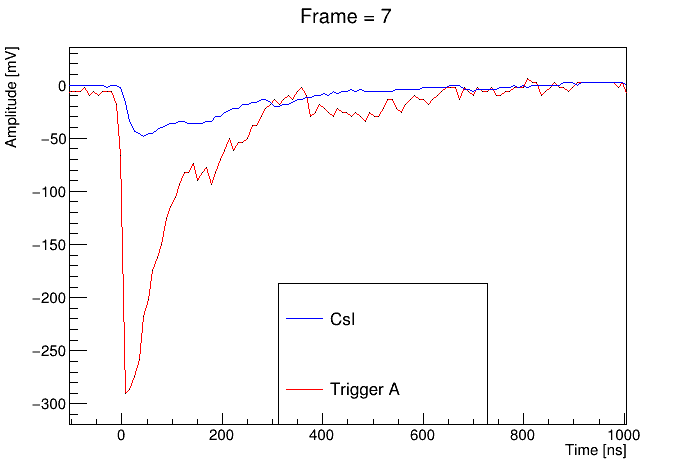

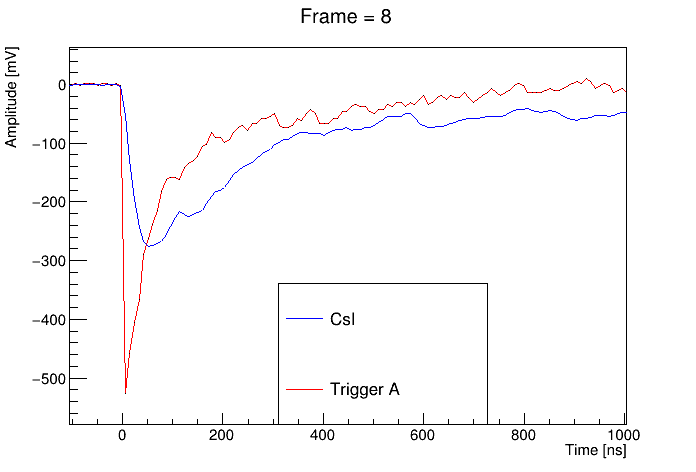

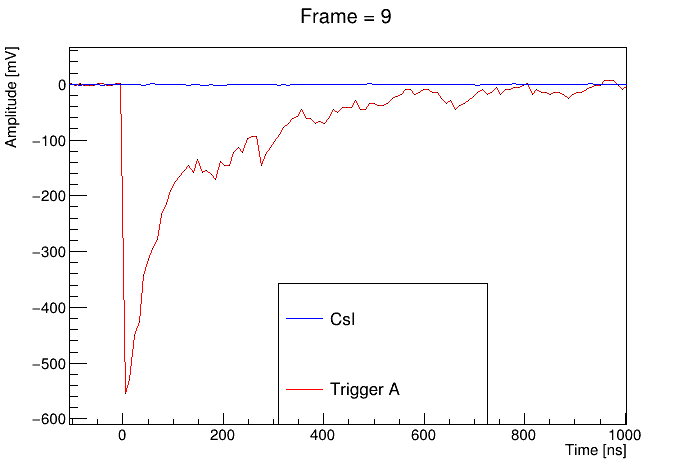

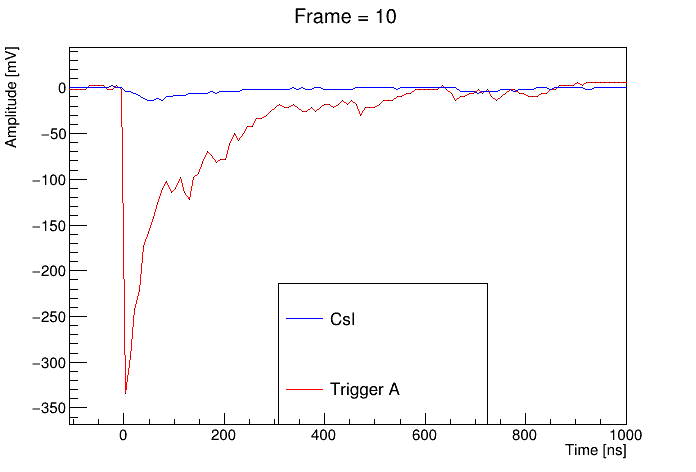

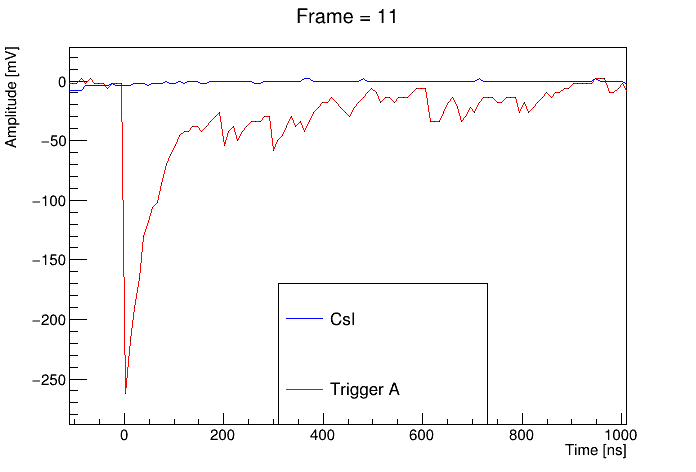

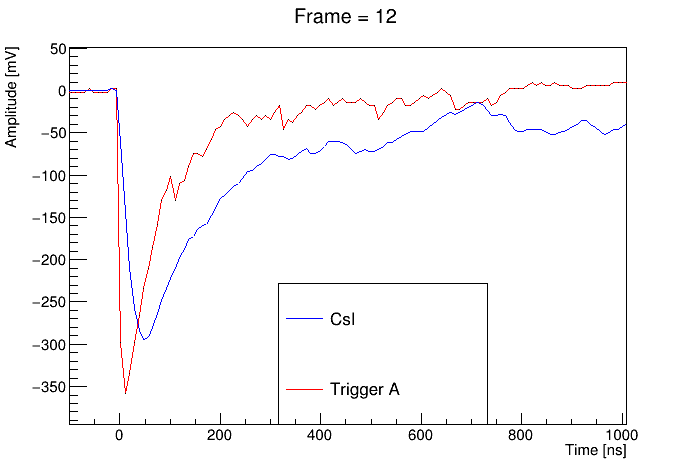

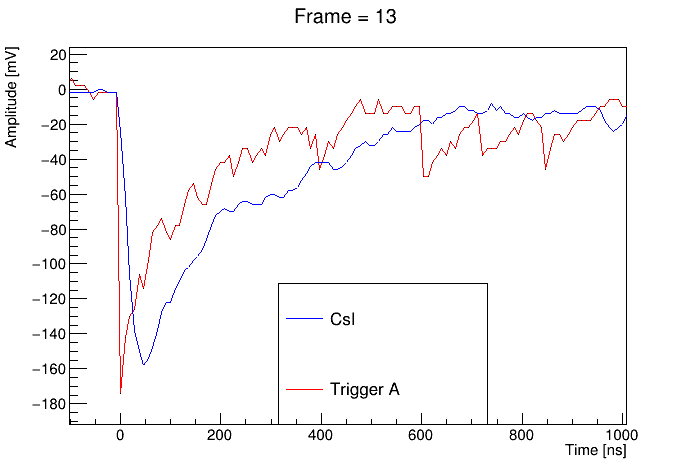

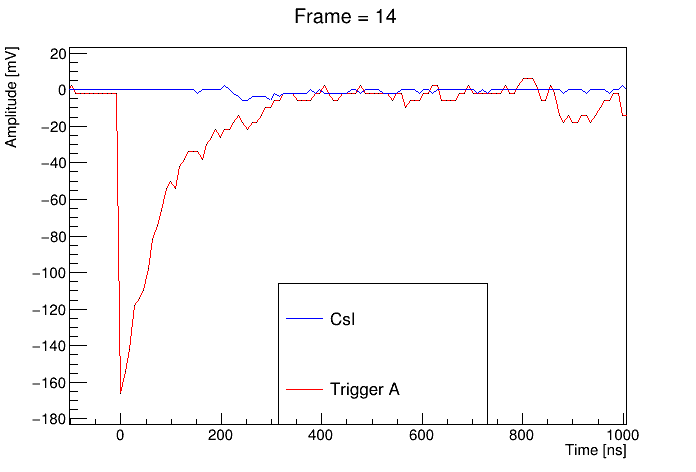

In [8]:
TCanvas *c1;
c1 = new TCanvas[n_frames];
for(int i = 7; i < n_frames; i++){
    ampl1_vs_time1[i].SetLineColor(kBlue);
    ampl2_vs_time2[i].SetLineColor(kRed);
    ampl2_vs_time2[i].SetTitle(Form("Frame = %d", i));
    ampl2_vs_time2[i].GetXaxis()->SetTitle("Time [ns]");
    ampl2_vs_time2[i].GetXaxis()->SetRangeUser(-100,1000);
    ampl2_vs_time2[i].GetYaxis()->SetTitle("Amplitude [mV]");
    c1[i].cd();
    ampl2_vs_time2[i].Draw();
    ampl1_vs_time1[i].Draw("same");
    TLegend *leg = new TLegend(0.4, 0.1, 0.7, 0.4);
    leg->SetFillColor(0);
    leg->SetTextSize(0.04);
    leg->SetTextFont(42);
    leg->SetFillStyle(0);
    leg->AddEntry(&ampl1_vs_time1[i], "CsI", "l");
    leg->AddEntry(&ampl2_vs_time2[i], "Trigger A", "l");
    leg->Draw();
    c1[i].Update();
    c1[i].Draw();
}